In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [2]:
file_names_lst = os.listdir('data')[1:]

tik_names_lst = [file_name.replace('.xlsx', '') for file_name in file_names_lst]

df_list = []
for file_name in file_names_lst:
    df = pd.read_excel('data/' + file_name).T
    df['ТИК'] = file_name.replace('.xlsx', '')
    df_list.append(df)
    
df_dict = dict(zip(tik_names_lst, df_list))

df_yik = pd.concat(df_list)

In [3]:
df_yik['УИК'] = df_yik.index
df_yik['УИК'] = df_yik['УИК'].map(lambda x: int(x.replace('УИК №', '')))
df_yik.sort_values(by=['УИК'], inplace=True)

In [4]:
df_yik.rename(columns={
    0: 'Число участников',
    1: 'Выданные бюллетени',
    2: 'Бюллетени в урнах',
    3: 'Недействительные бюллетени',
    4: 'Голосов за',
    5: 'Голосов против'}, inplace=True)

In [5]:
df_yik['Явка%'] = df_yik['Бюллетени в урнах'] / df_yik['Число участников'] * 100
df_yik['за%'] = df_yik['Голосов за'] / df_yik['Бюллетени в урнах'] * 100
df_yik['против%'] = df_yik['Голосов против'] / df_yik['Бюллетени в урнах'] * 100
df_yik.reset_index(inplace=True)

In [6]:
df_tik = df_yik \
    .groupby('ТИК', as_index=False)[['Число участников', 'Бюллетени в урнах', 'Голосов за', 'Голосов против']] \
    .sum()

In [7]:
df_tik['Явка%'] = df_tik['Бюллетени в урнах'] / df_tik['Число участников'] * 100
df_tik['за%'] = df_tik['Голосов за'] / df_tik['Бюллетени в урнах'] * 100
df_tik['против%'] = df_tik['Голосов против'] / df_tik['Бюллетени в урнах'] * 100

In [8]:
yavka_reg = df_tik['Бюллетени в урнах'].sum() / df_tik['Число участников'].sum() * 100
za_reg = df_tik['Голосов за'].sum() / df_tik['Бюллетени в урнах'].sum() * 100
protiv_reg = df_tik['Голосов против'].sum() / df_tik['Бюллетени в урнах'].sum() * 100
kol_yik_reg = df_yik.shape[0]

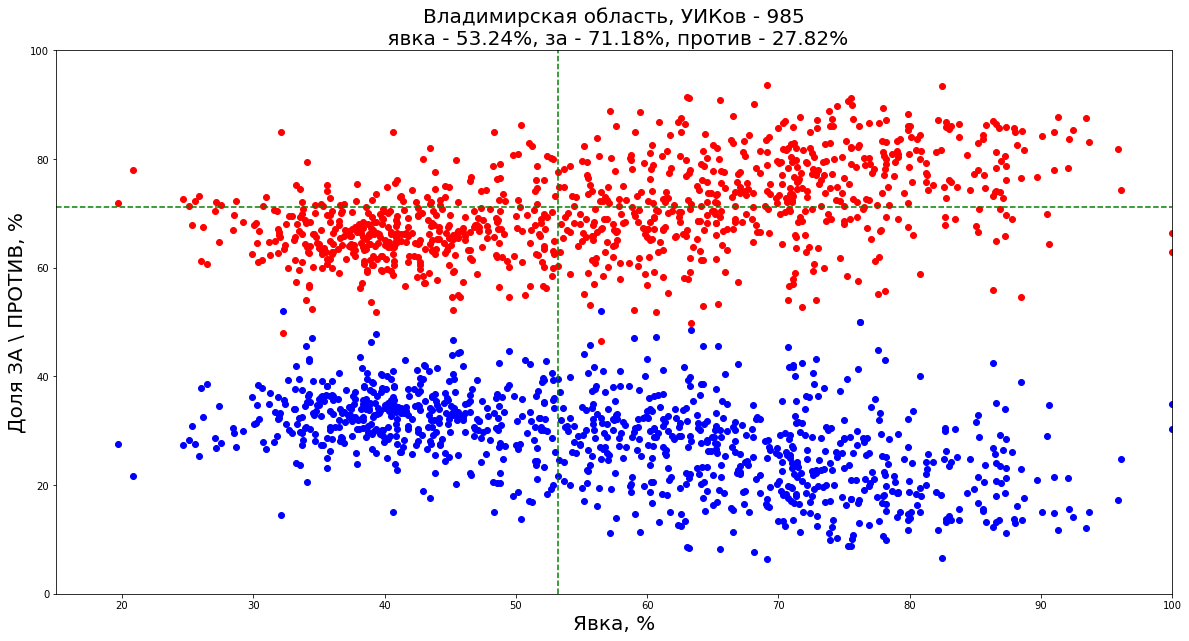

In [9]:
figure, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20,10))
axes.scatter(
    df_yik['Явка%'], 
    df_yik['за%'],
    c='r'
);
axes.scatter(
    df_yik['Явка%'], 
    df_yik['против%'],
    c='b');
axes.set_xlabel('Явка, %', fontsize=20);
axes.set_ylabel('Доля ЗА \ ПРОТИВ, %', fontsize=20);

axes.axvline(x=yavka_reg, ls='--', c='g');
axes.axhline(y=za_reg, ls='--', c='g');
axes.set_xlim(15, 100);
axes.set_ylim(0, 100);
axes.set_title(
    'Владимирская область, УИКов - {}\n явка - {}%, за - {}%, против - {}%'\
    .format(kol_yik_reg, round(yavka_reg, 2), round(za_reg, 2), round(protiv_reg, 2)),
    fontsize=20);
figure.savefig('plots/Владимирская область.png');

C:\Users\AKIMGAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


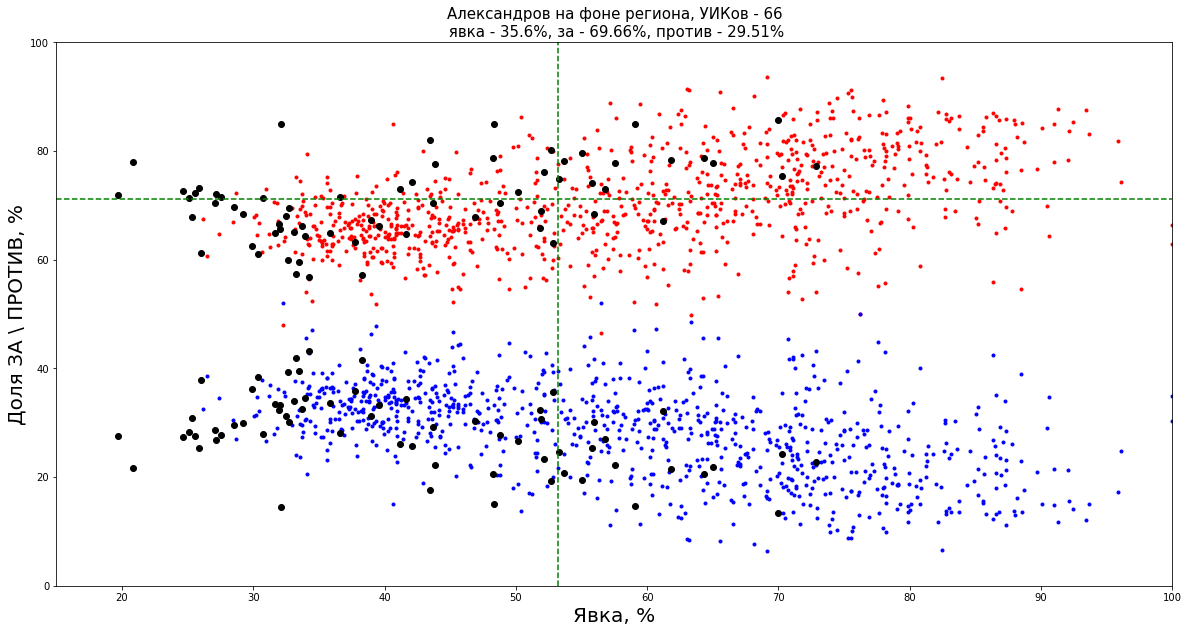

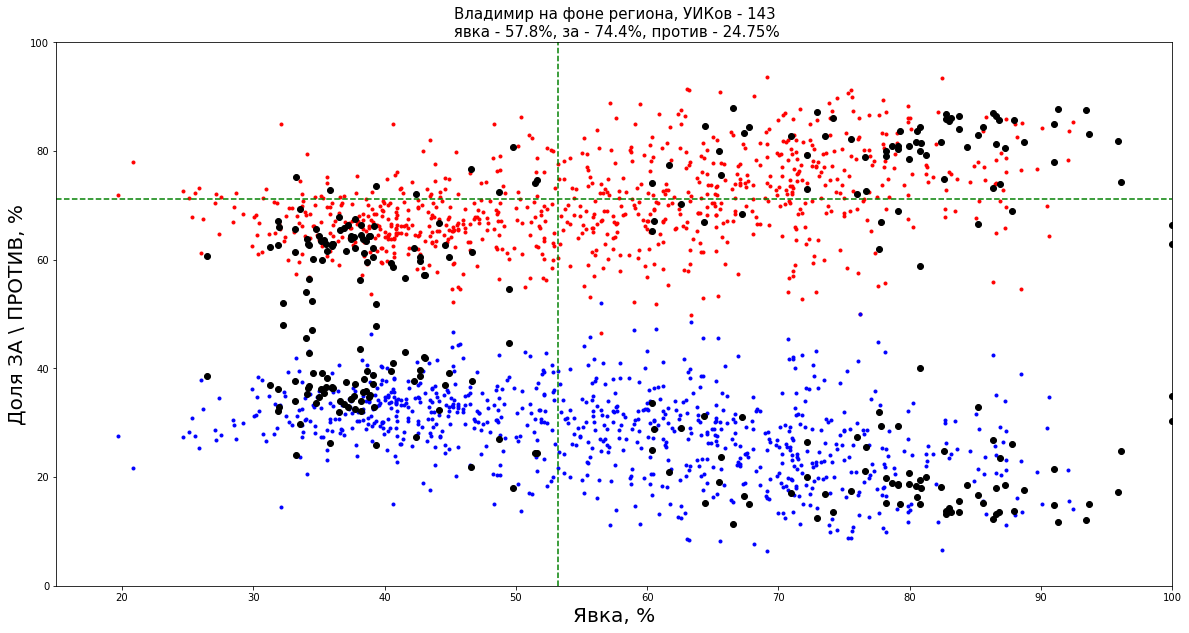

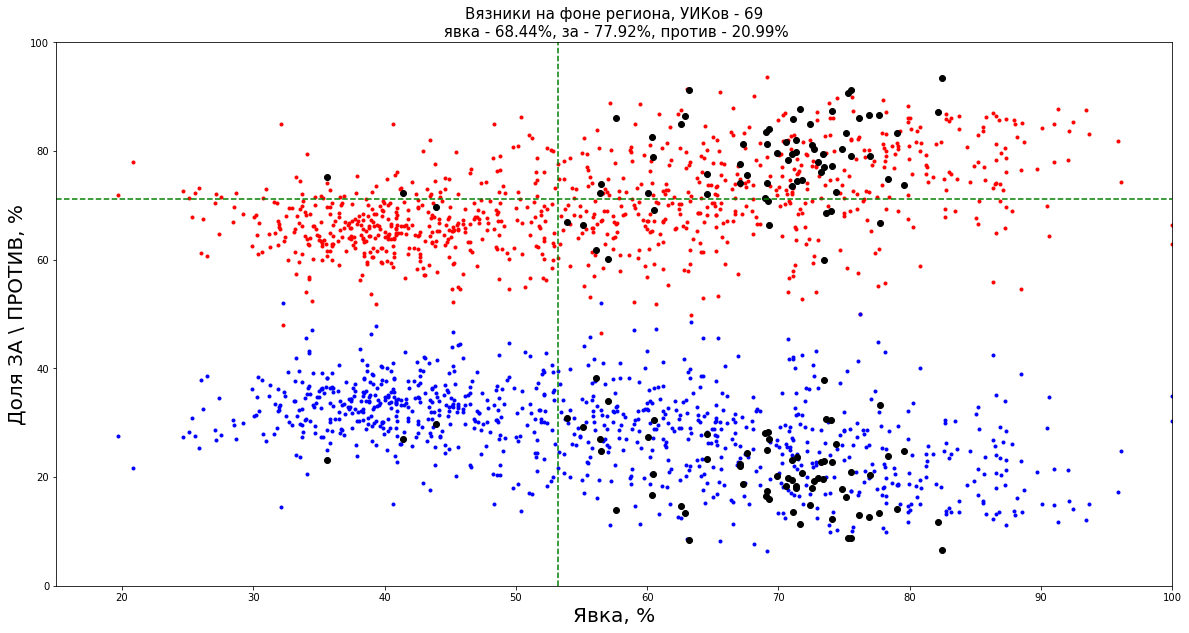

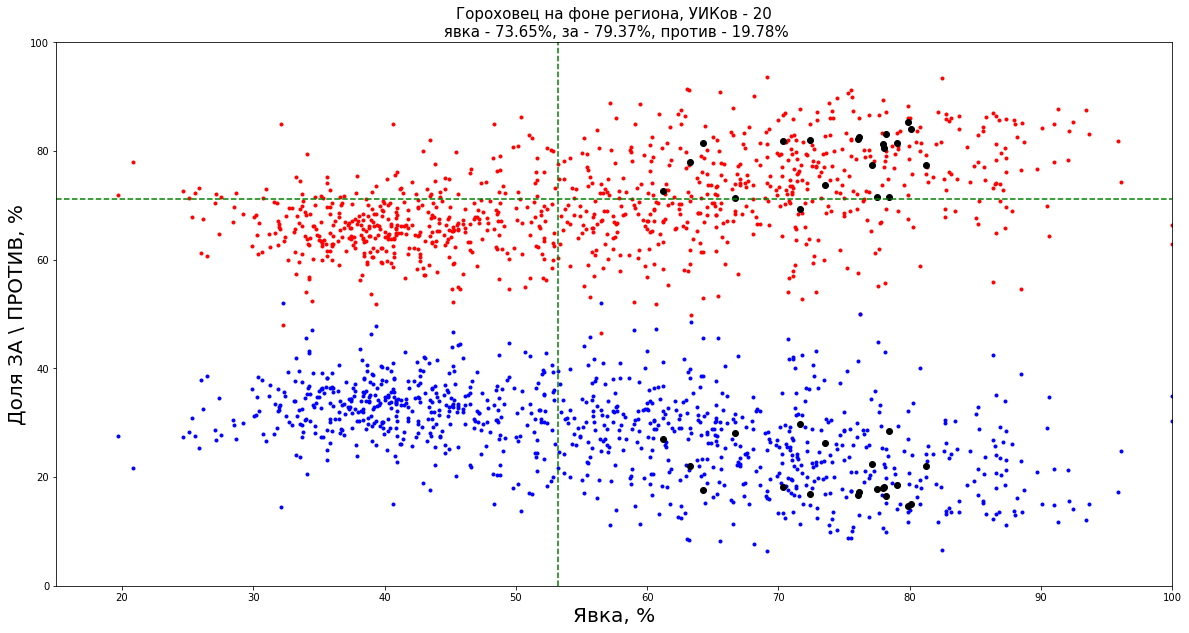

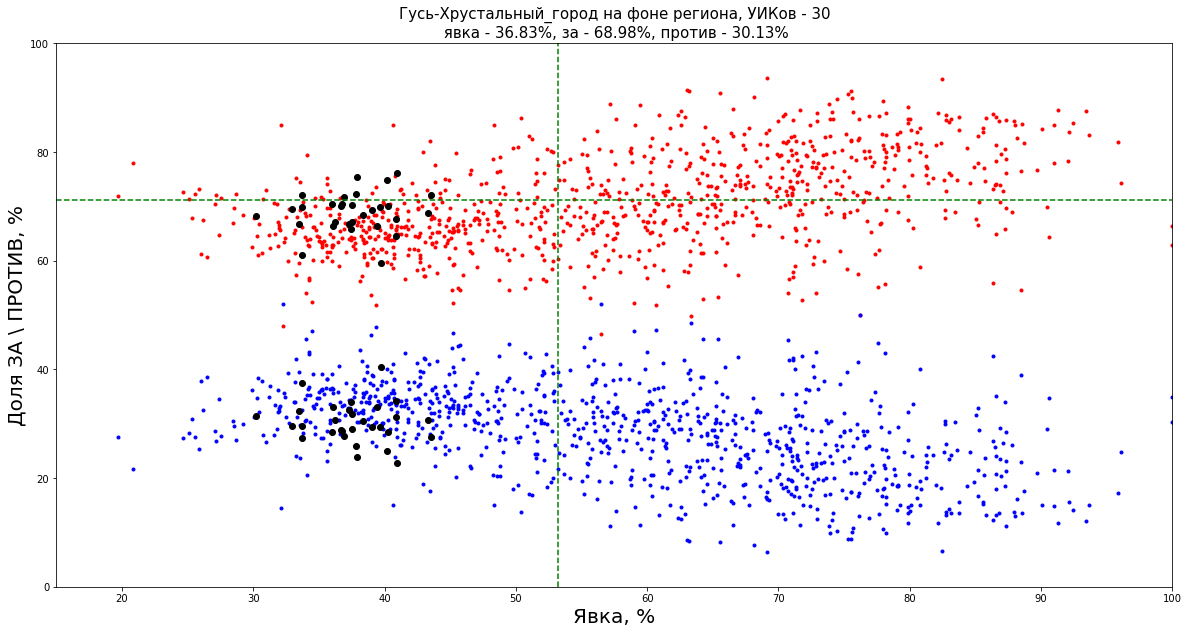

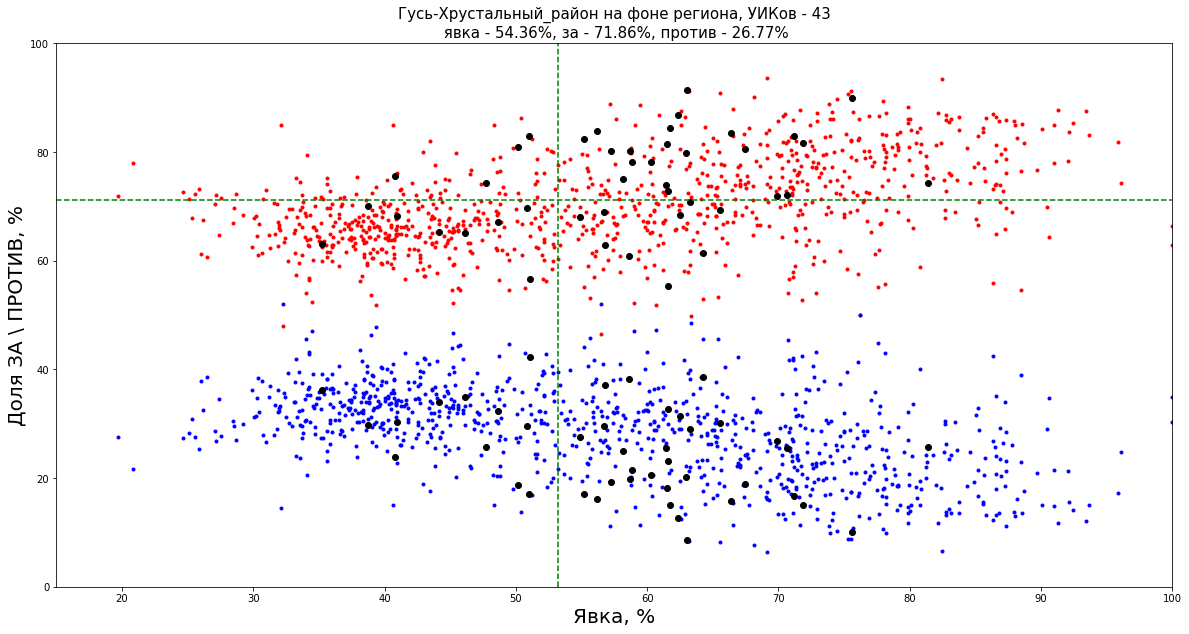

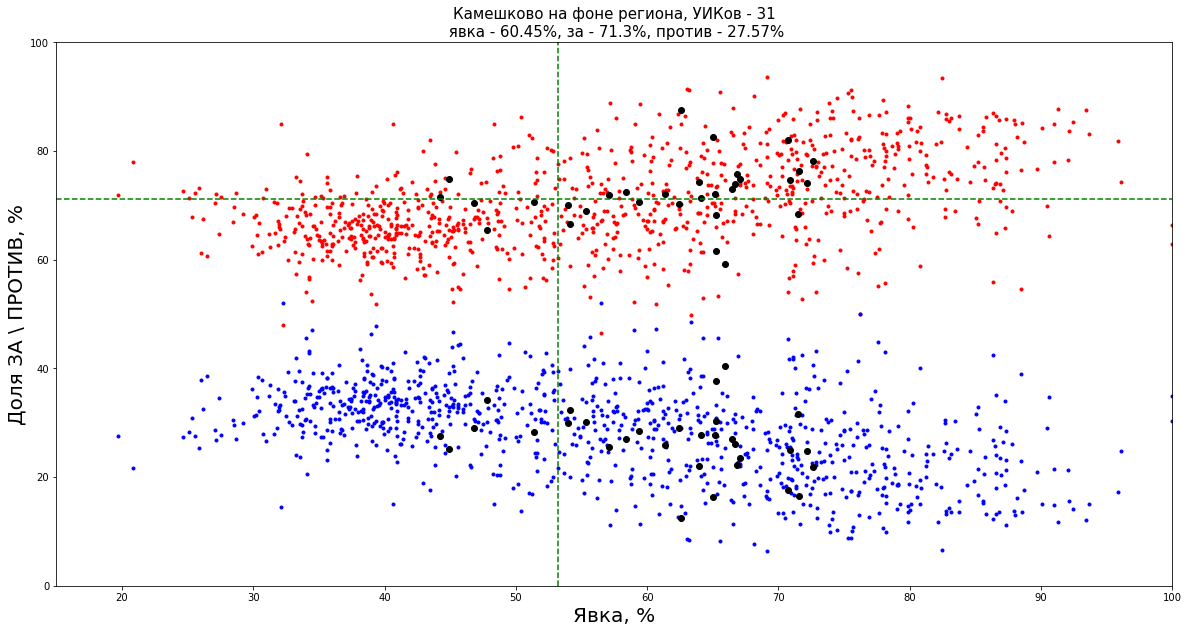

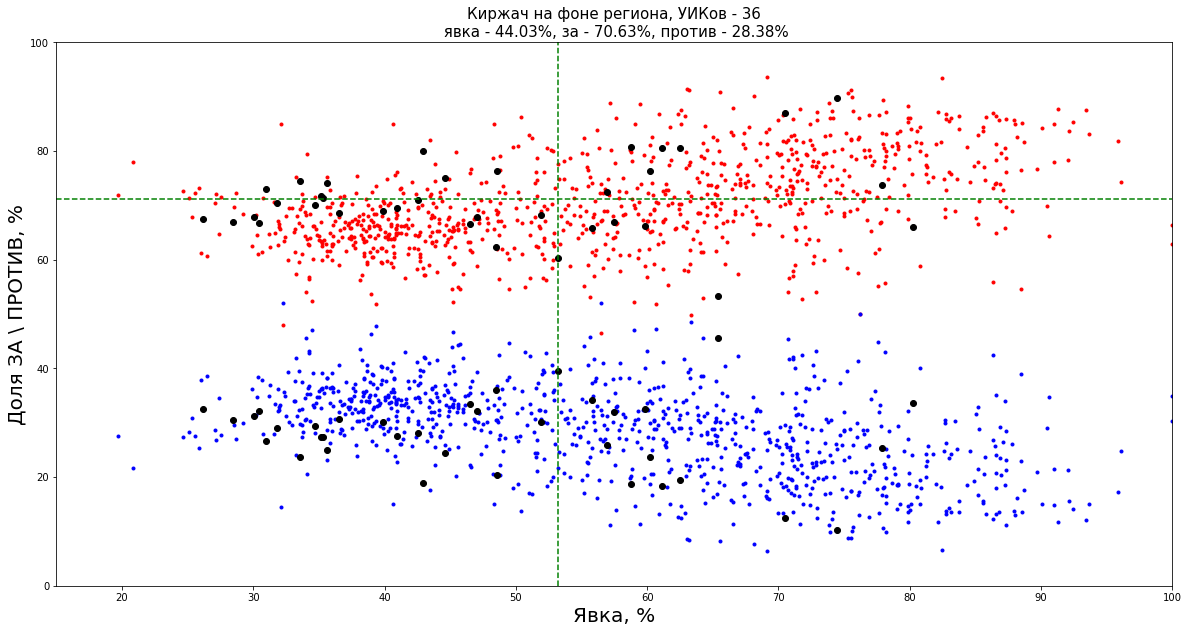

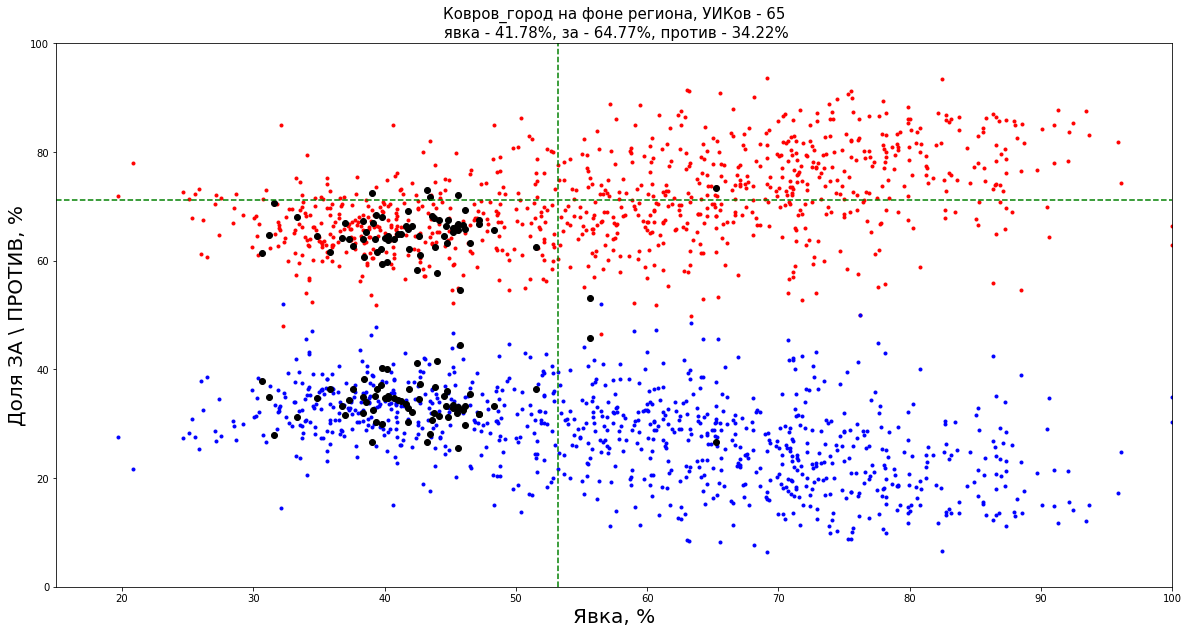

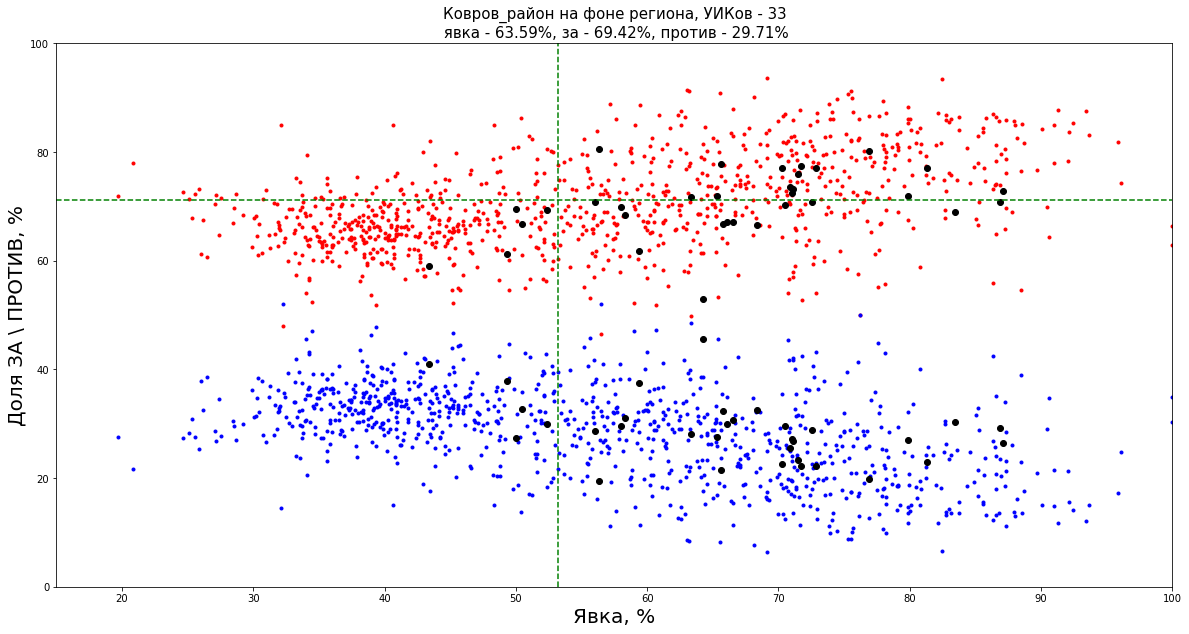

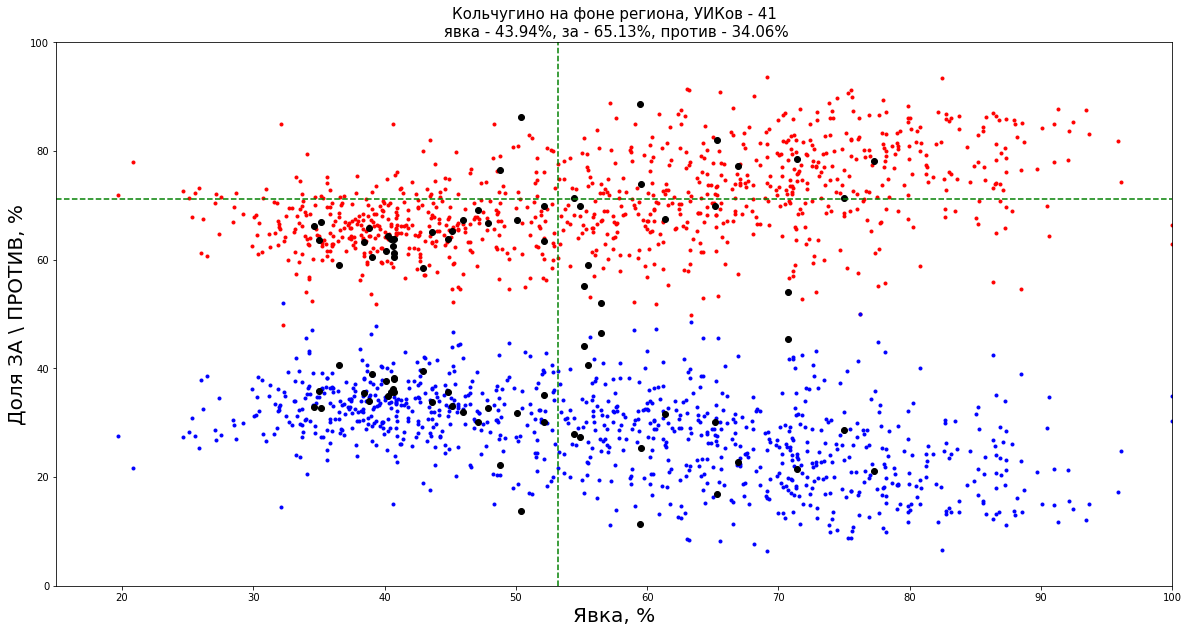

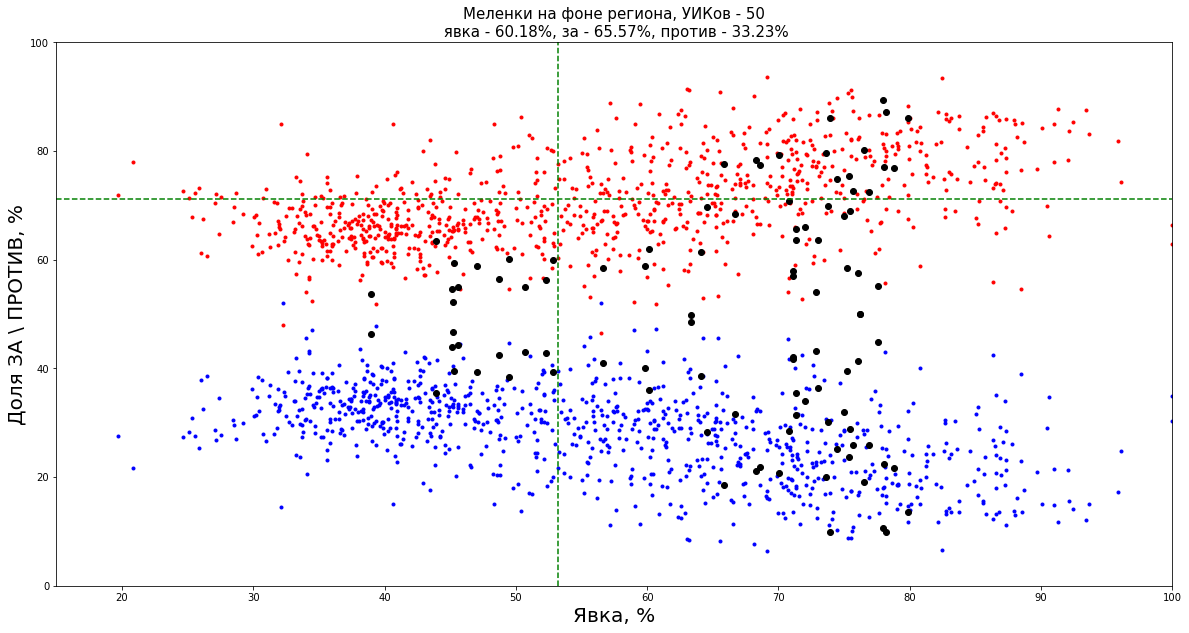

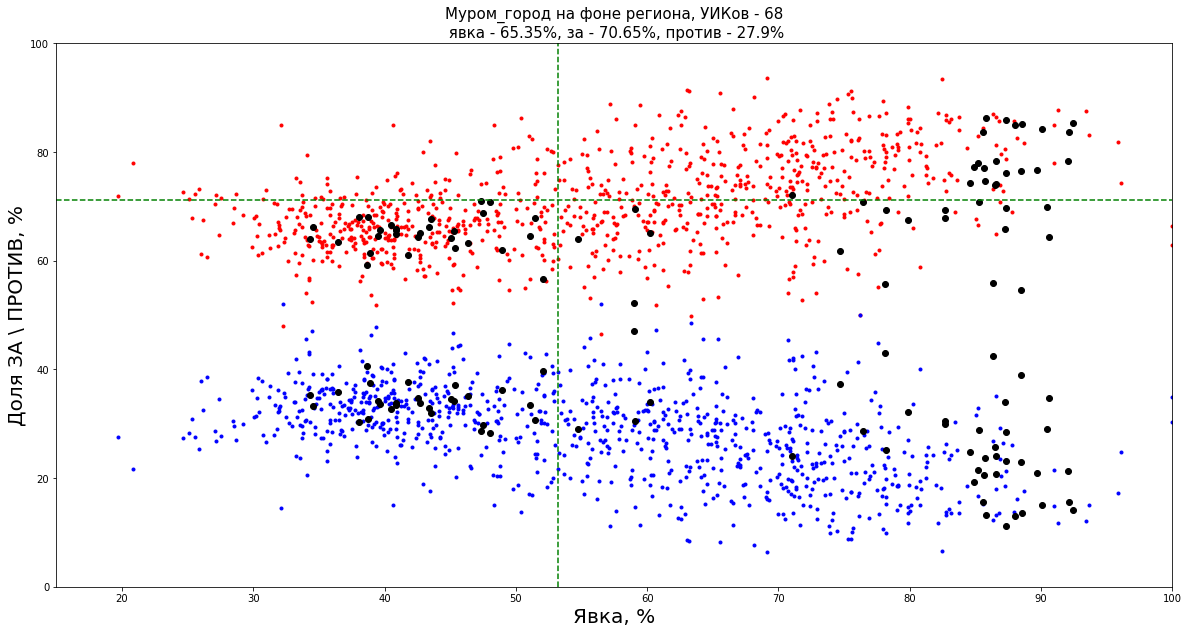

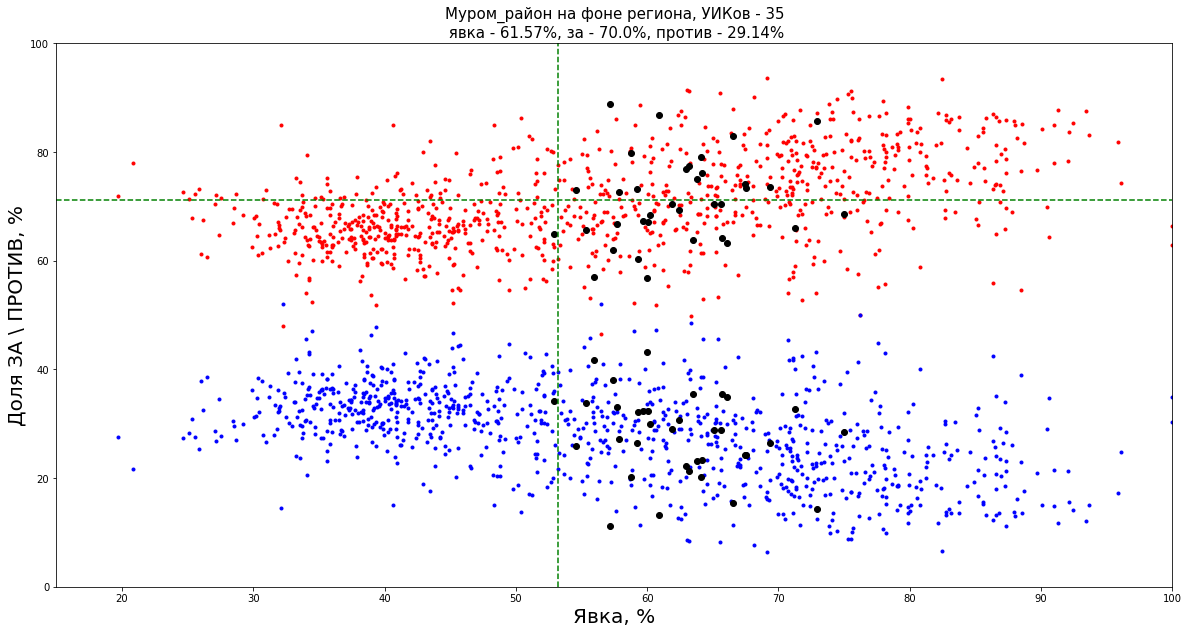

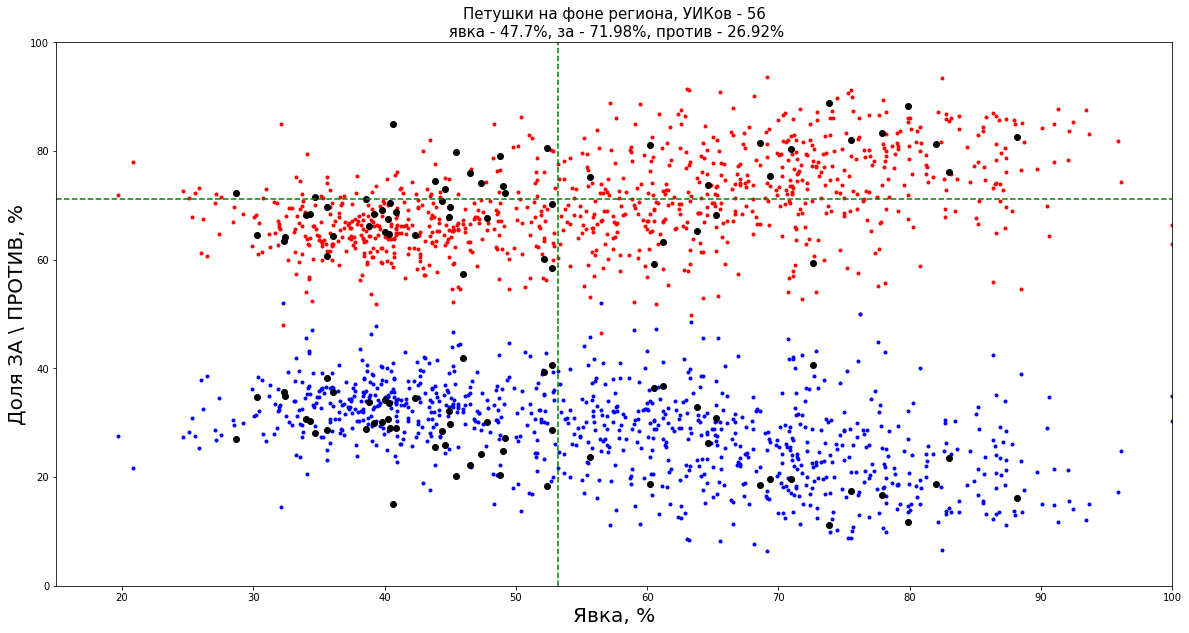

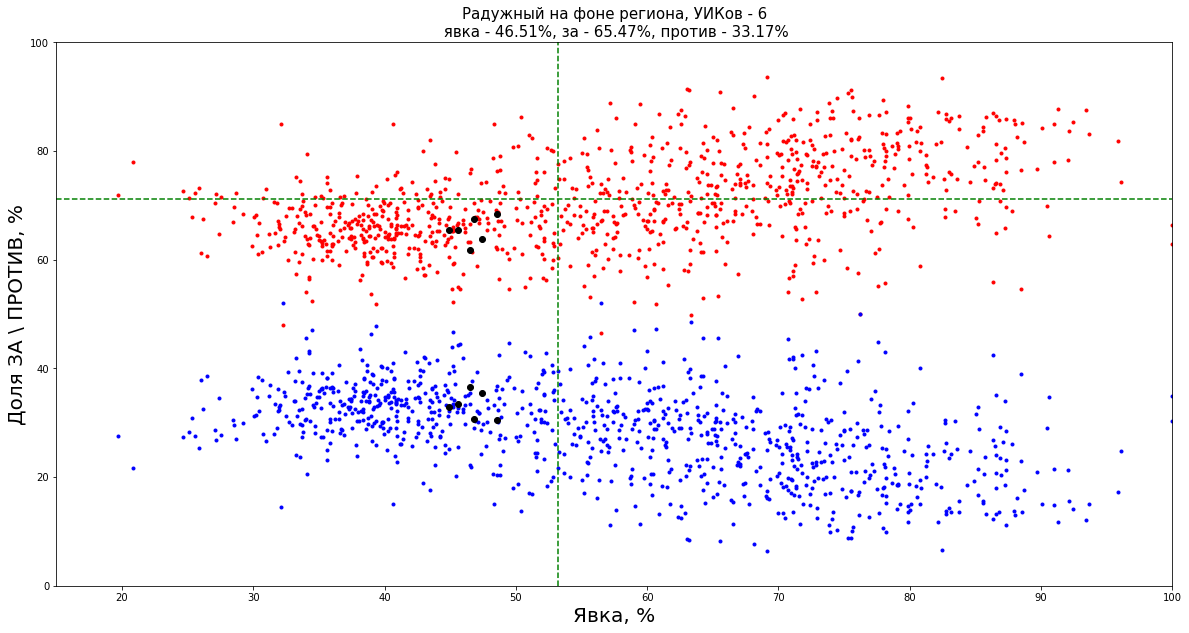

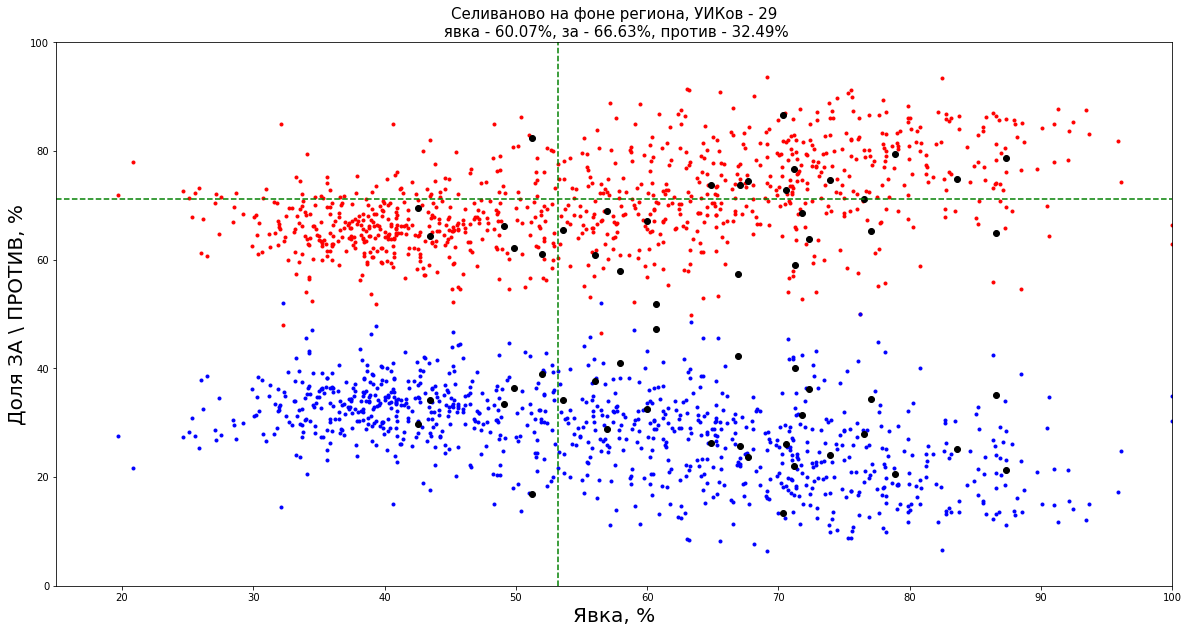

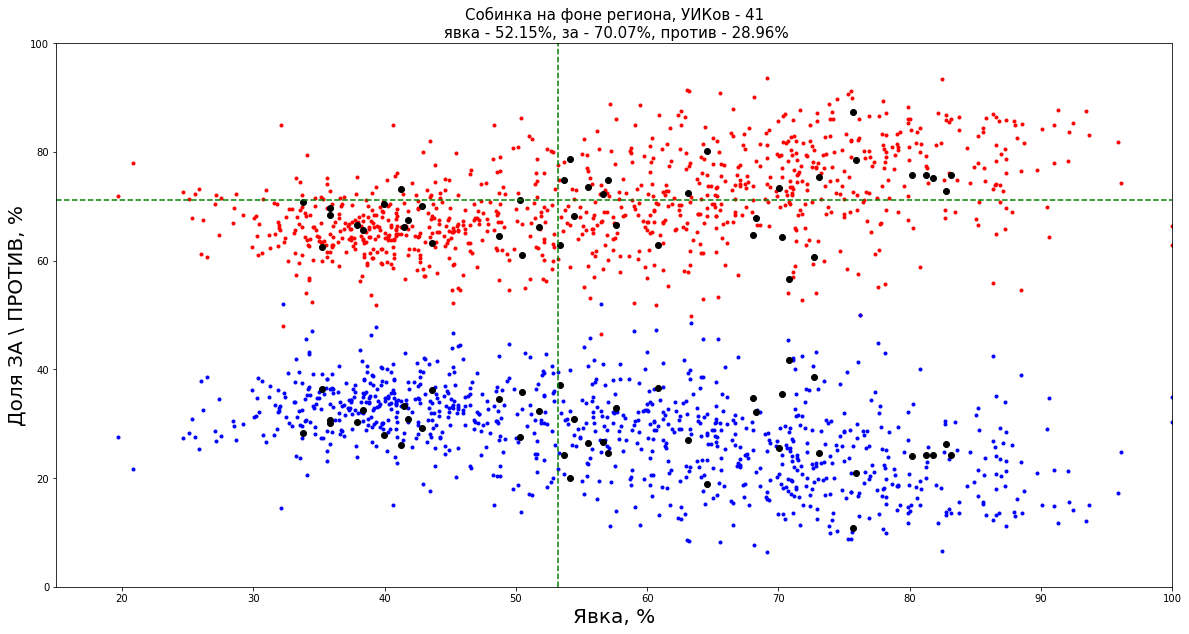

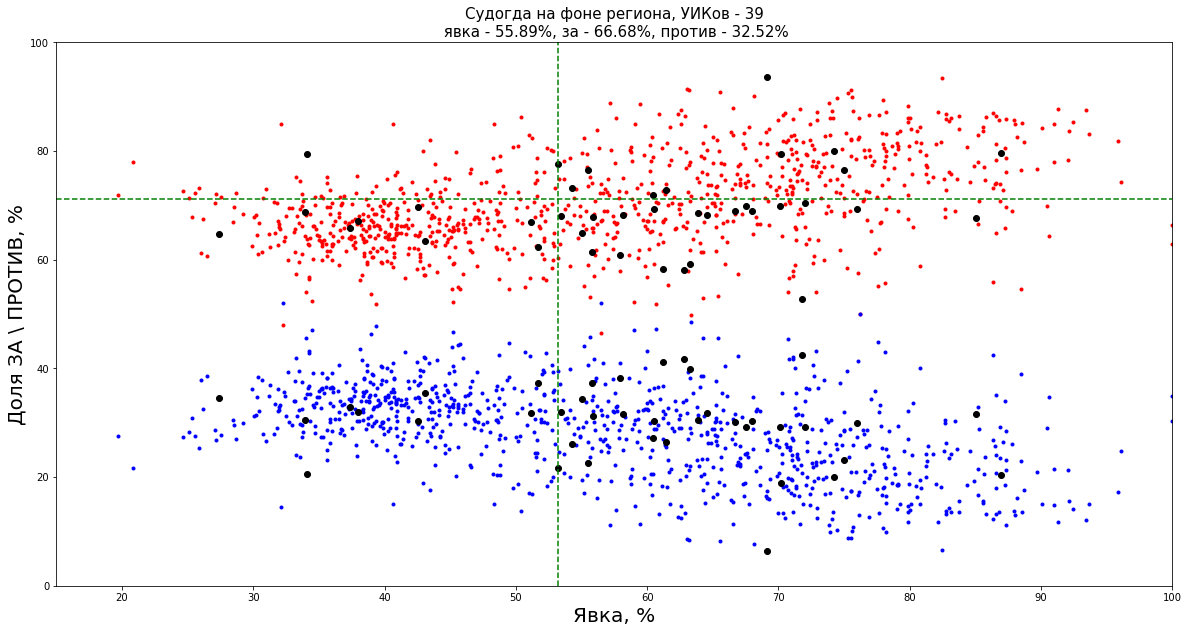

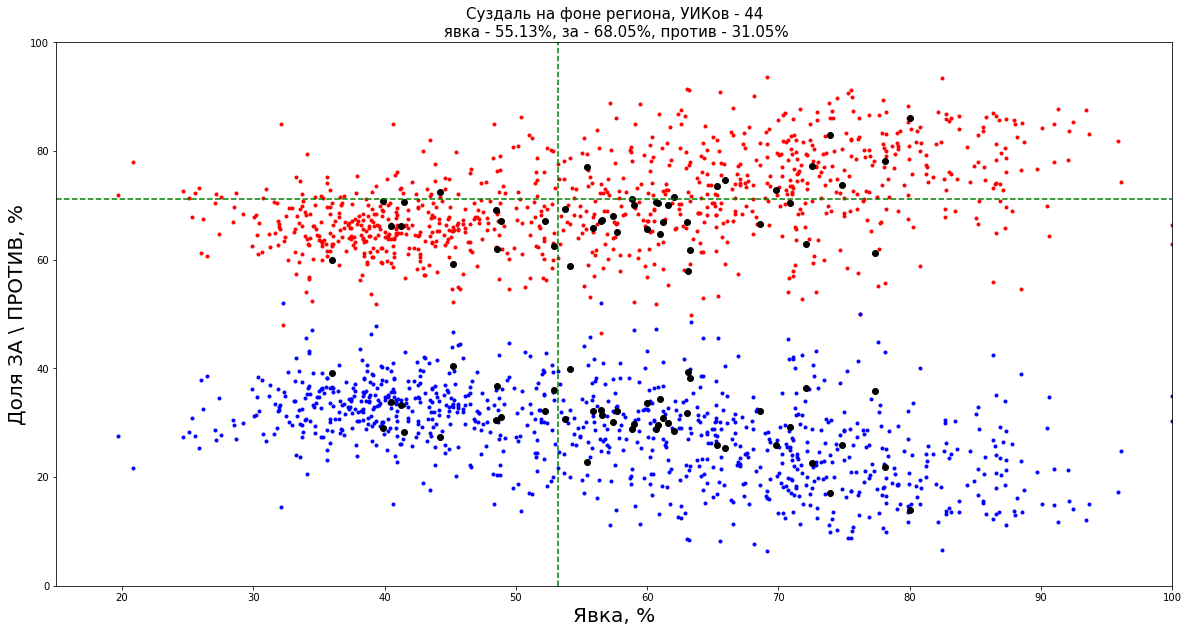

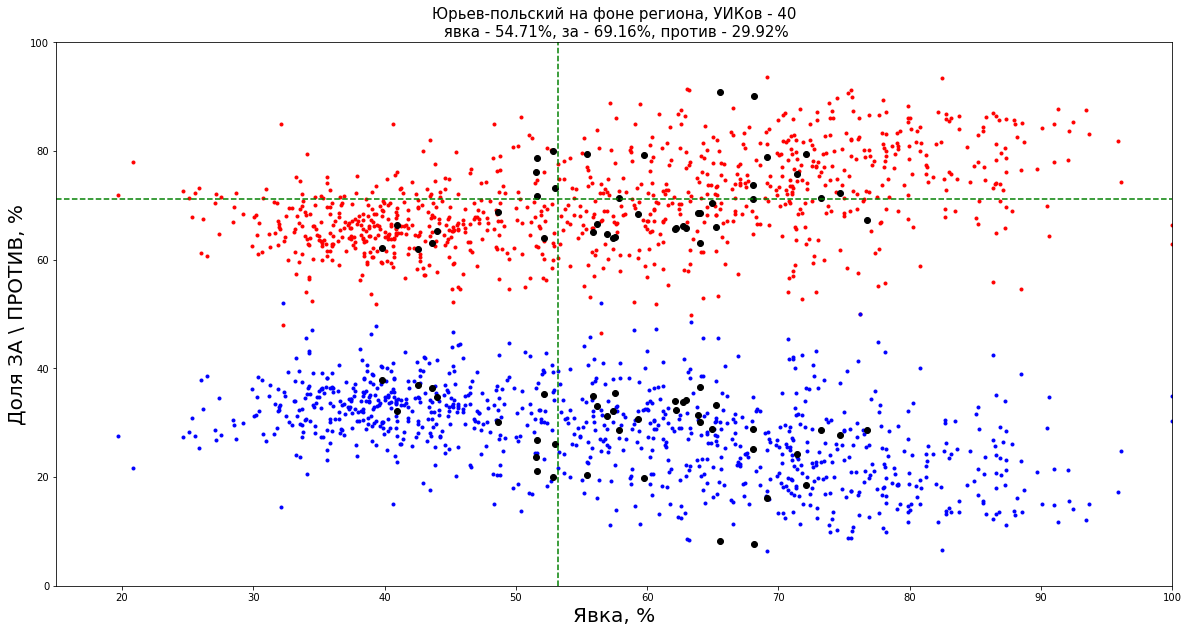

In [11]:
for tik_idx in range(df_tik.shape[0]):
    figure, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20,10))
    
    tik_name = df_tik.iloc[tik_idx]['ТИК']
    df_cur_tik = df_yik[df_yik['ТИК'] == tik_name]
    df_rest = df_yik[df_yik['ТИК'] != tik_name]

    axes.scatter(
        df_rest['Явка%'], 
        df_rest['за%'],
        c='r',
        marker='.'
    );
    axes.scatter(
        df_rest['Явка%'], 
        df_rest['против%'],
        c='b',
        marker='.'
    );

    axes.scatter(
        df_cur_tik['Явка%'], 
        df_cur_tik['за%'],
        c='black',
        marker='o'
    );
    axes.scatter(
        df_cur_tik['Явка%'], 
        df_cur_tik['против%'],
        c='black',
        marker='o'
    );
    
    yavka = df_cur_tik['Бюллетени в урнах'].sum() / df_cur_tik['Число участников'].sum() * 100
    za = df_cur_tik['Голосов за'].sum() / df_cur_tik['Бюллетени в урнах'].sum() * 100
    protiv = df_cur_tik['Голосов против'].sum() / df_cur_tik['Бюллетени в урнах'].sum() * 100
    kol_yik = df_cur_tik.shape[0]

    axes.set_xlabel('Явка, %', fontsize=20);
    axes.set_ylabel('Доля ЗА \ ПРОТИВ, %', fontsize=20);

    axes.axvline(x=yavka_reg, ls='--', c='g');
    axes.axhline(y=za_reg, ls='--', c='g');
    axes.set_xlim(15, 100);
    axes.set_ylim(0, 100);
    axes.set_title(
        '{} на фоне региона, УИКов - {}\n явка - {}%, за - {}%, против - {}%'\
        .format(tik_name, kol_yik, round(yavka, 2), round(za, 2), round(protiv, 2)),
        fontsize=15);
    figure.savefig('plots/{}_на фоне региона.png'.format(tik_name));

##### Выгрузка графиков по ТИКам в файлы

C:\Users\AKIMGAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


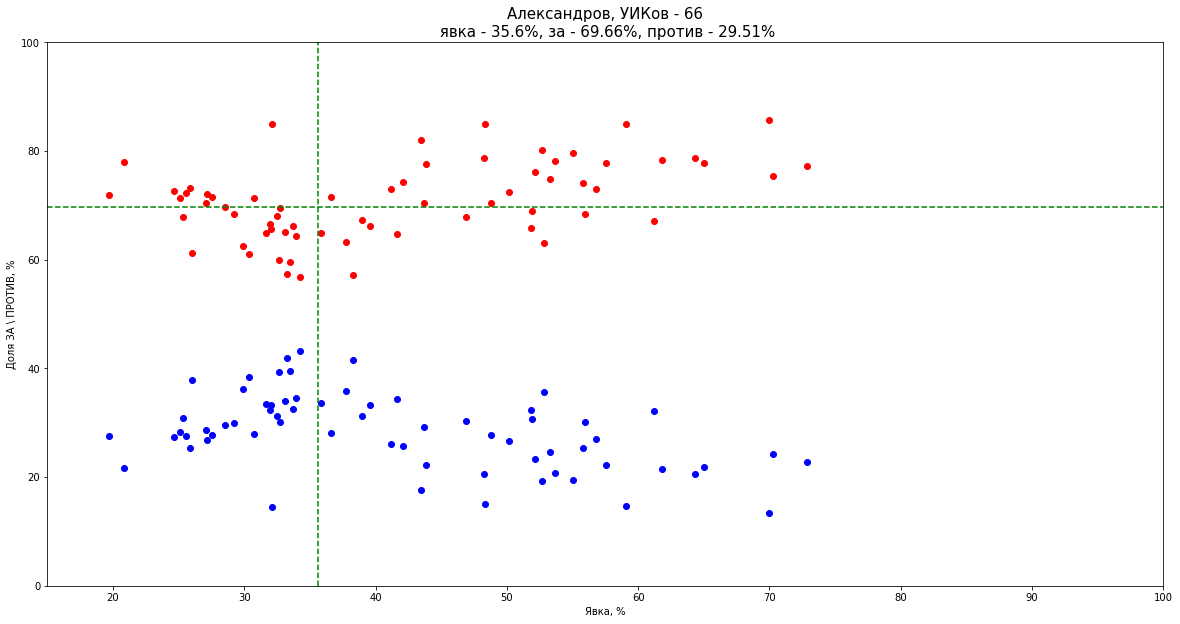

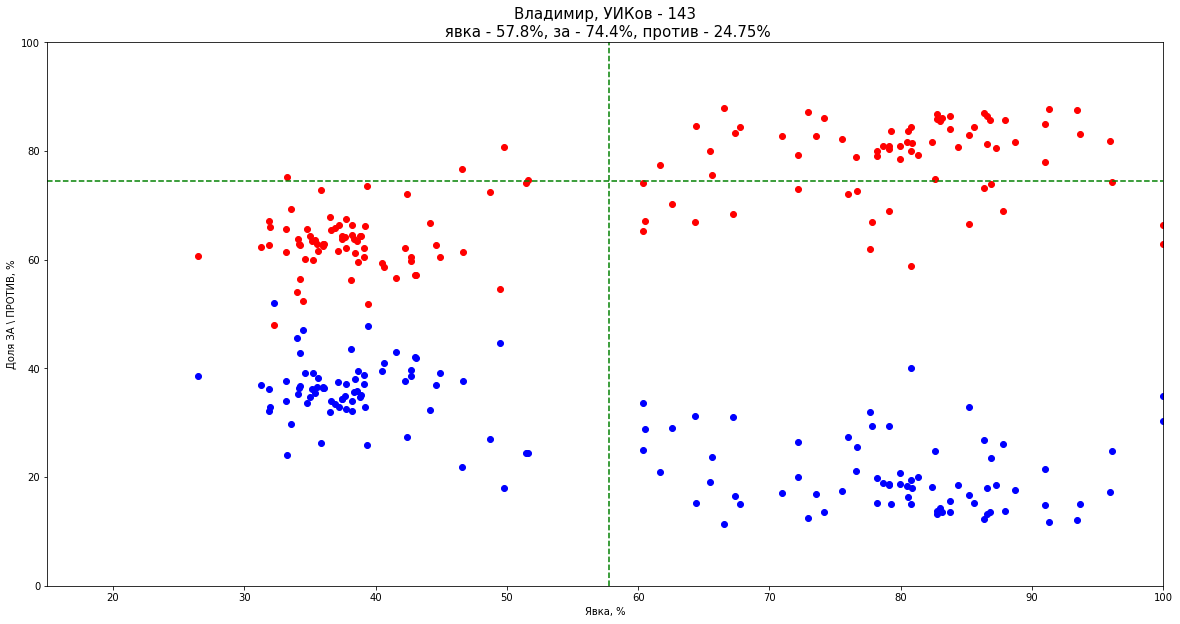

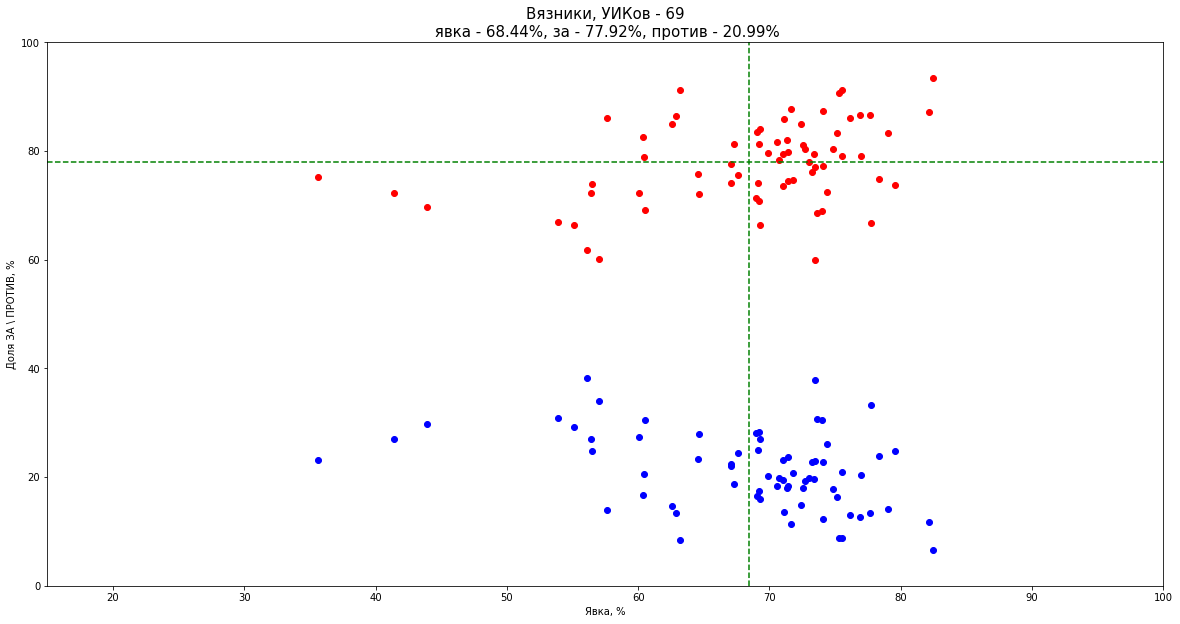

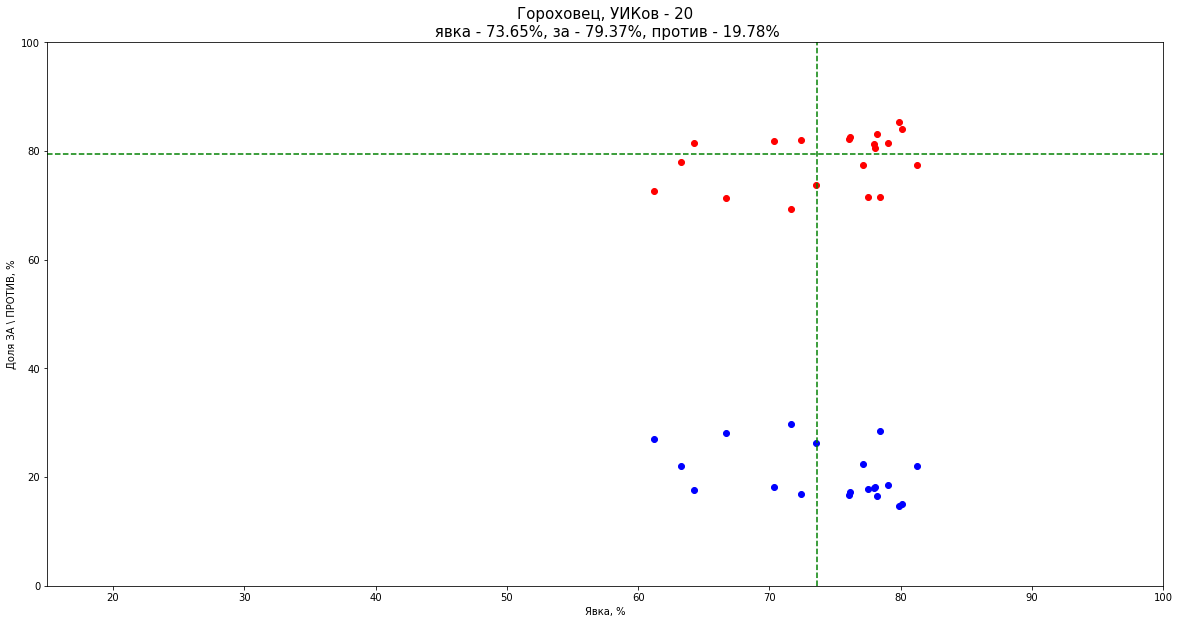

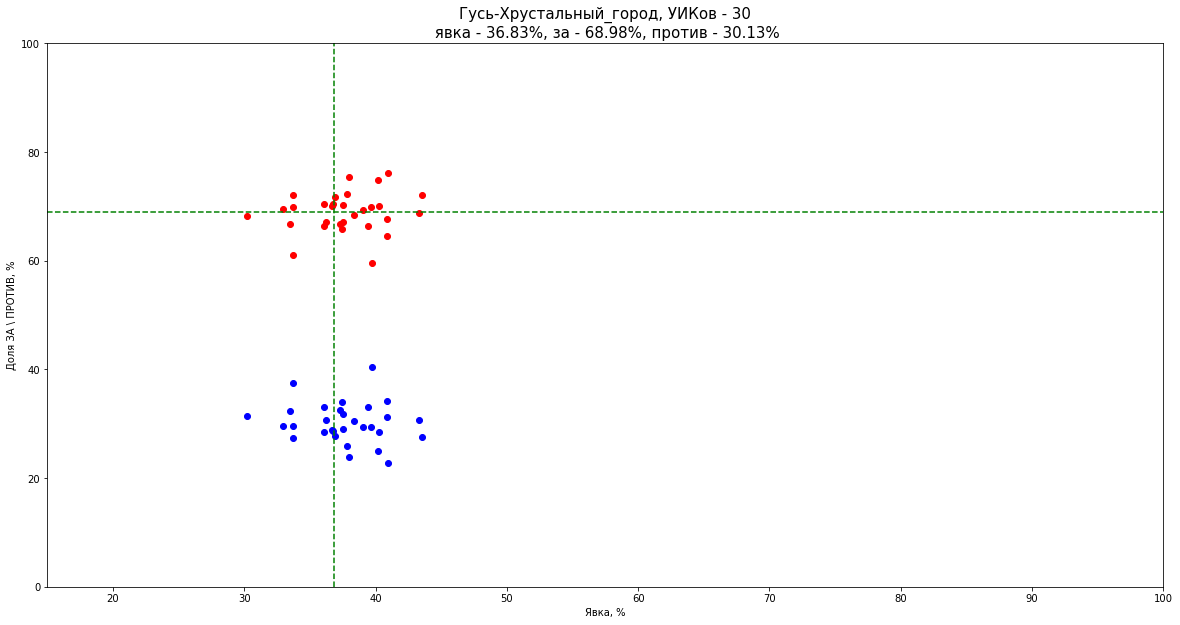

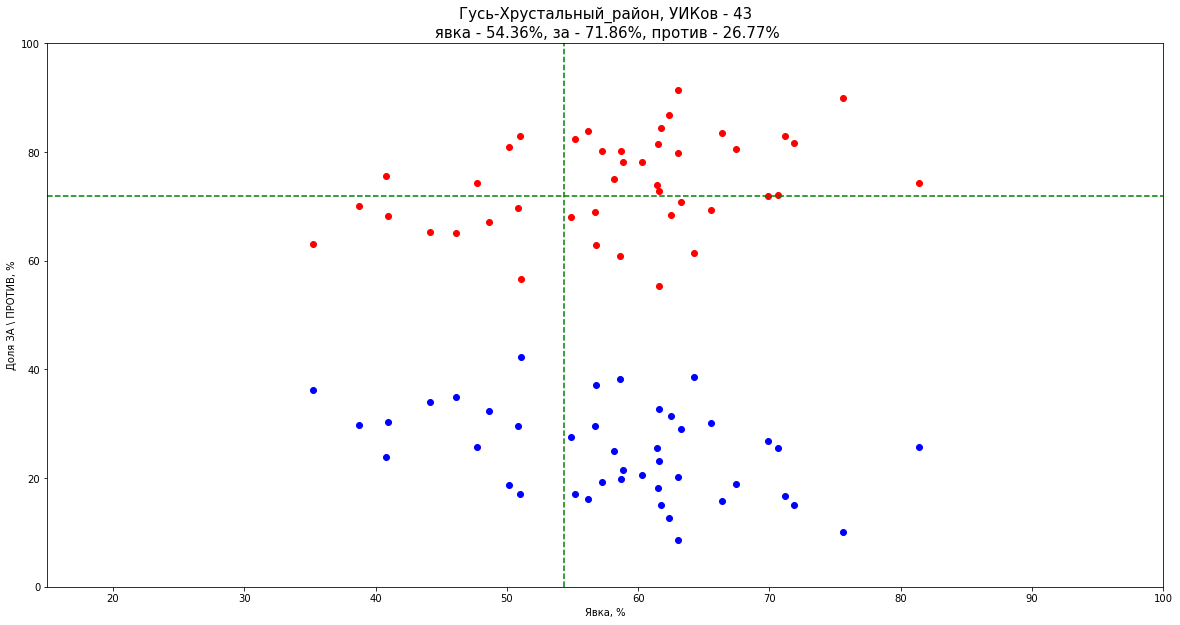

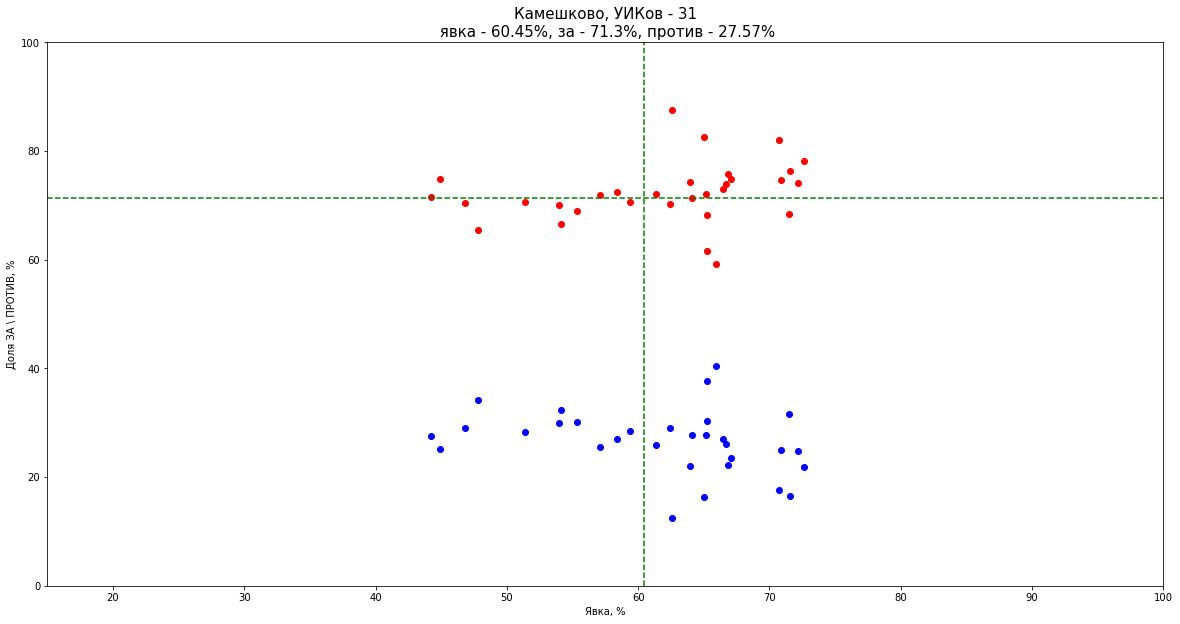

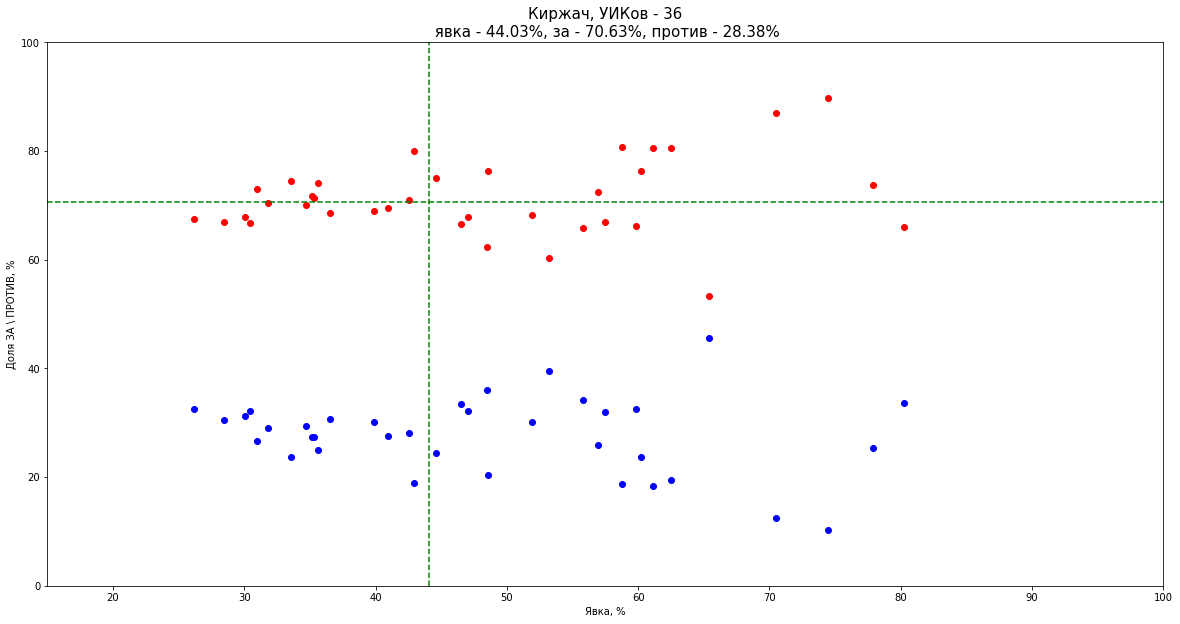

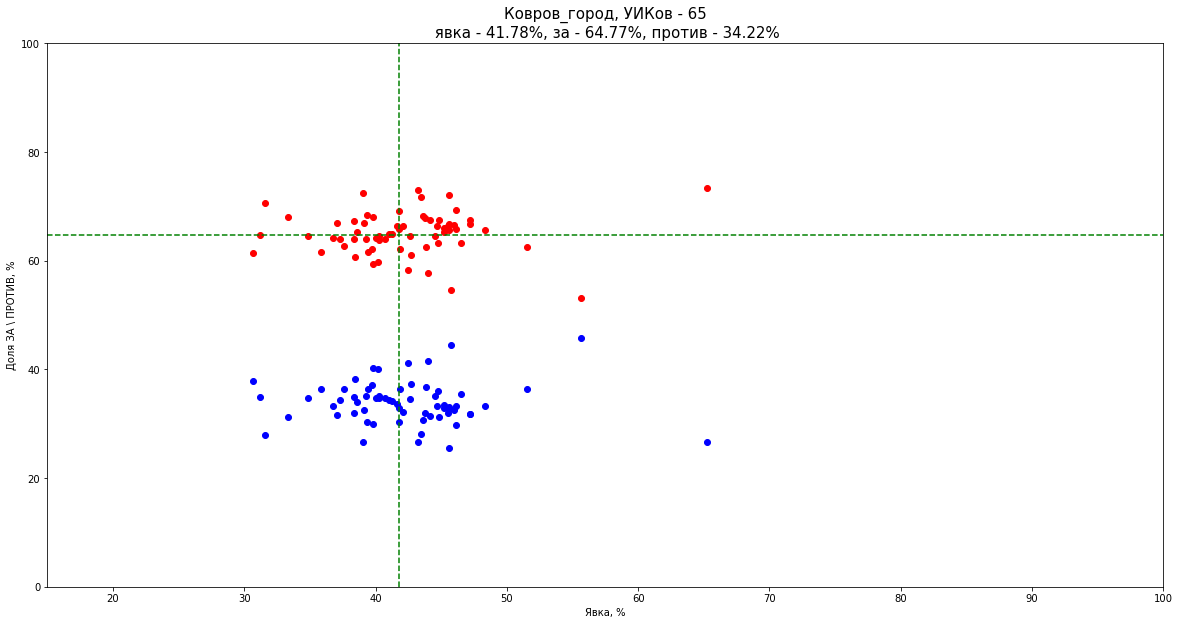

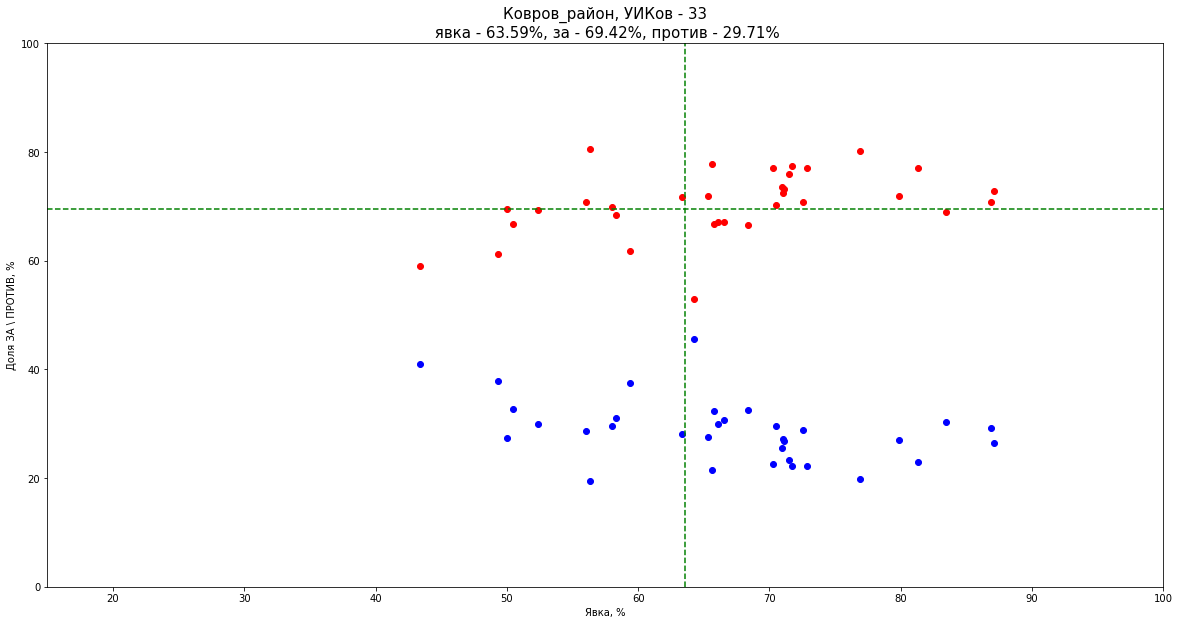

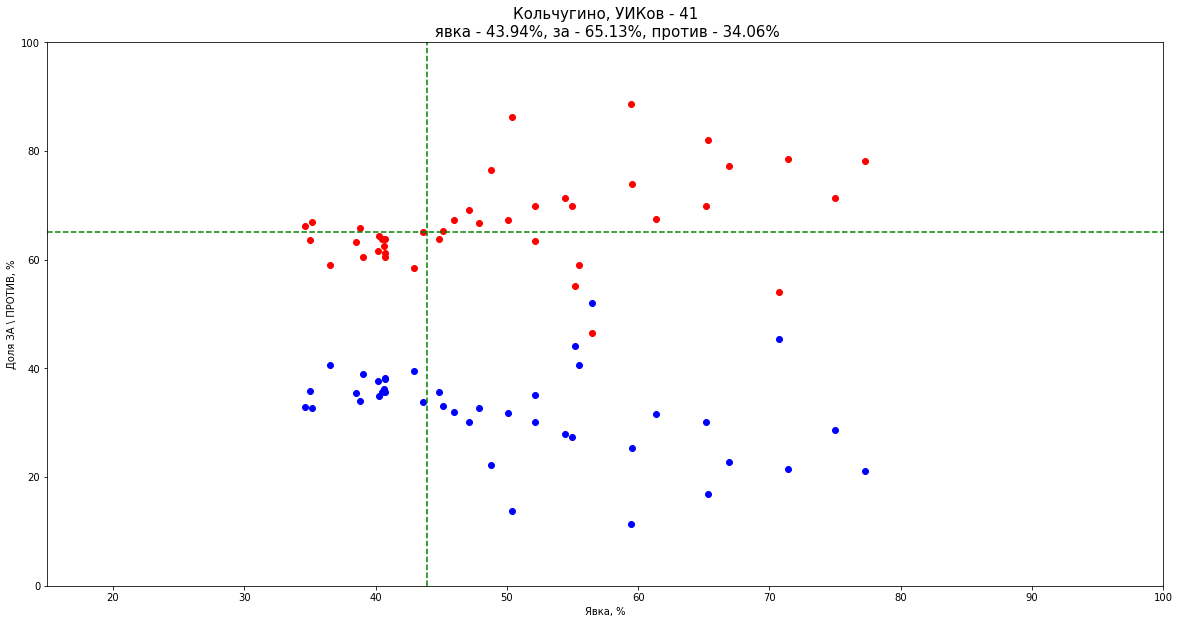

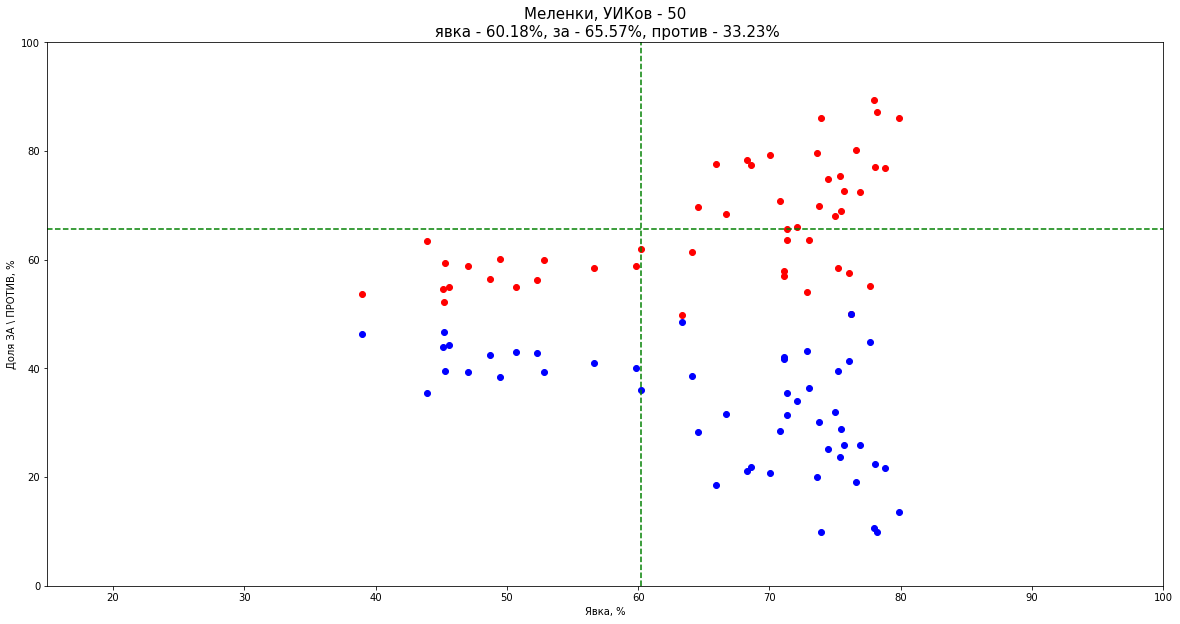

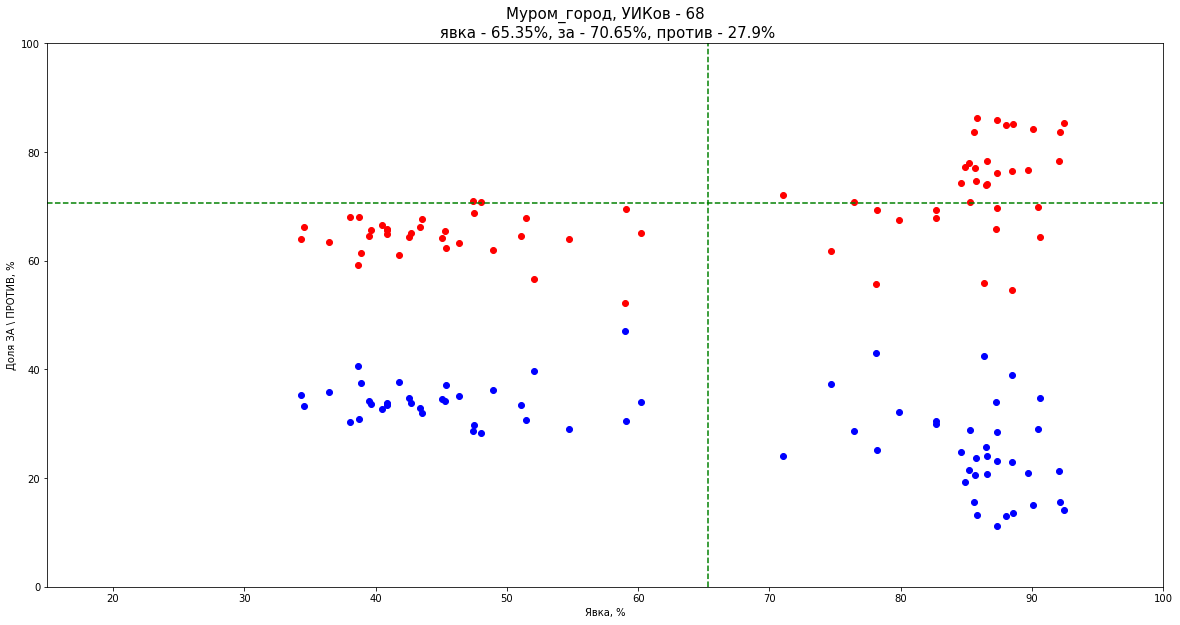

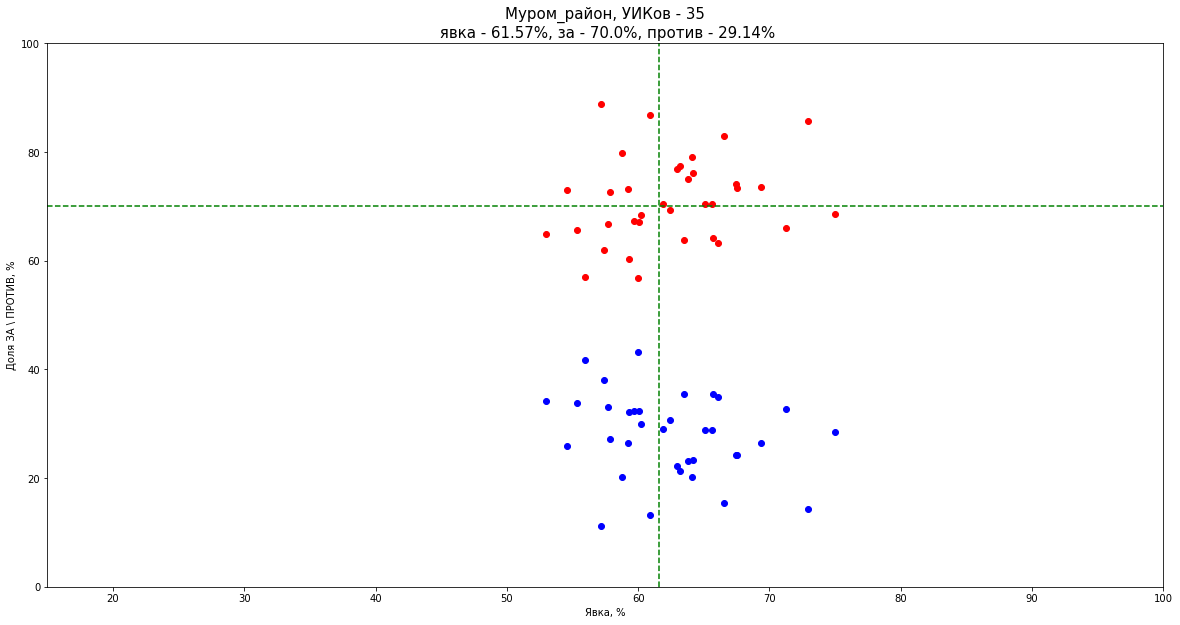

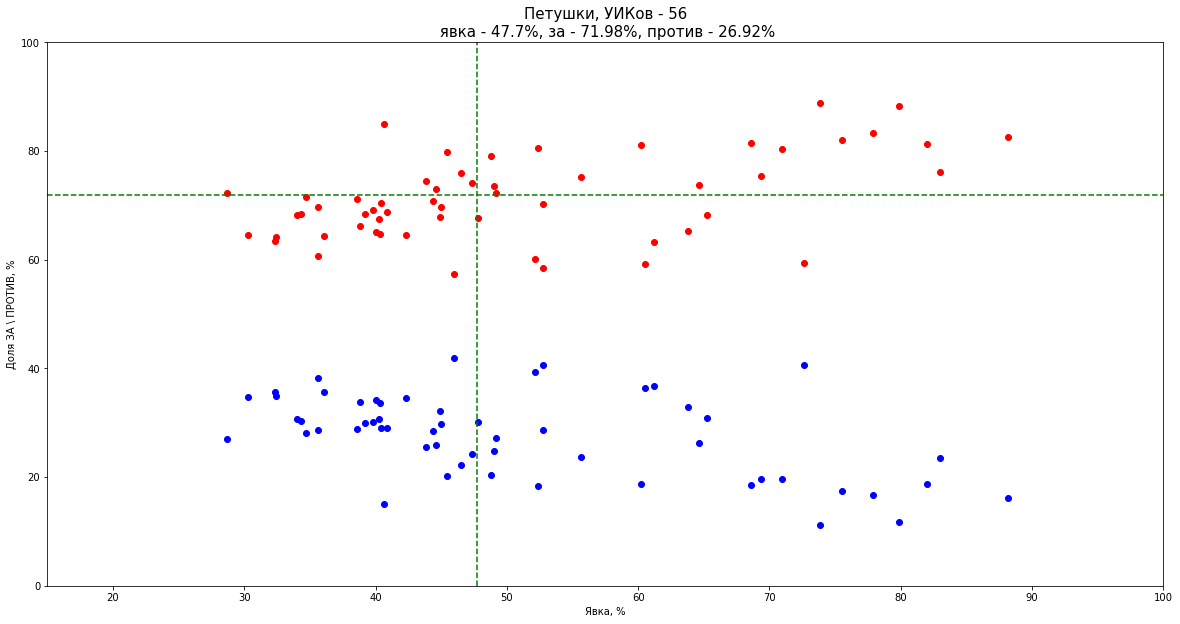

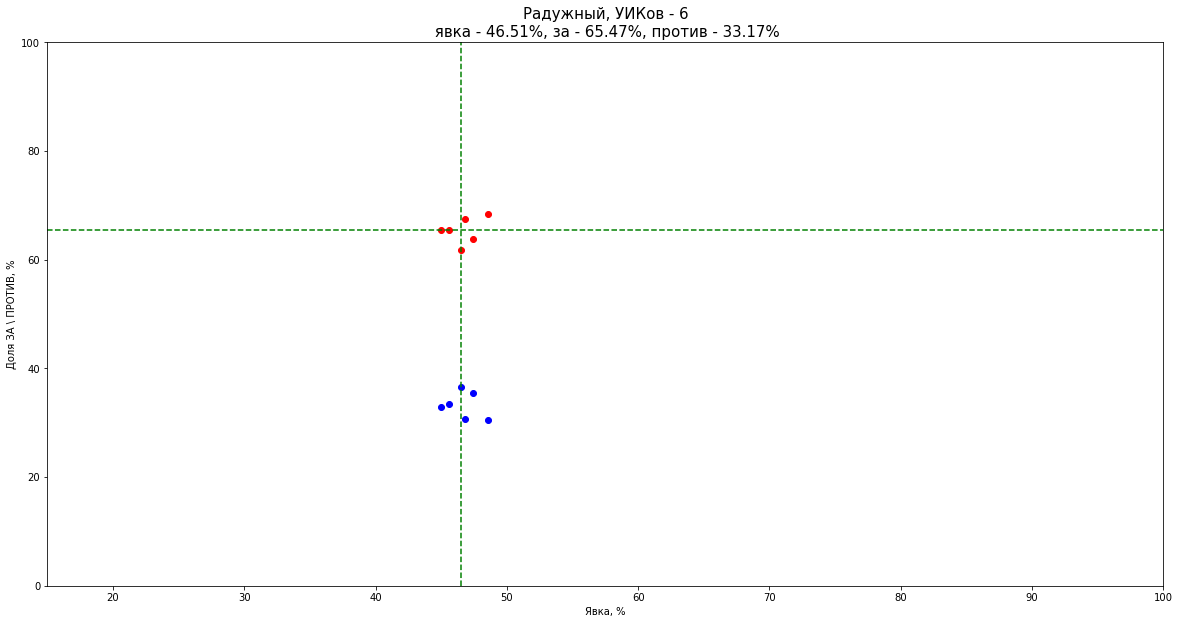

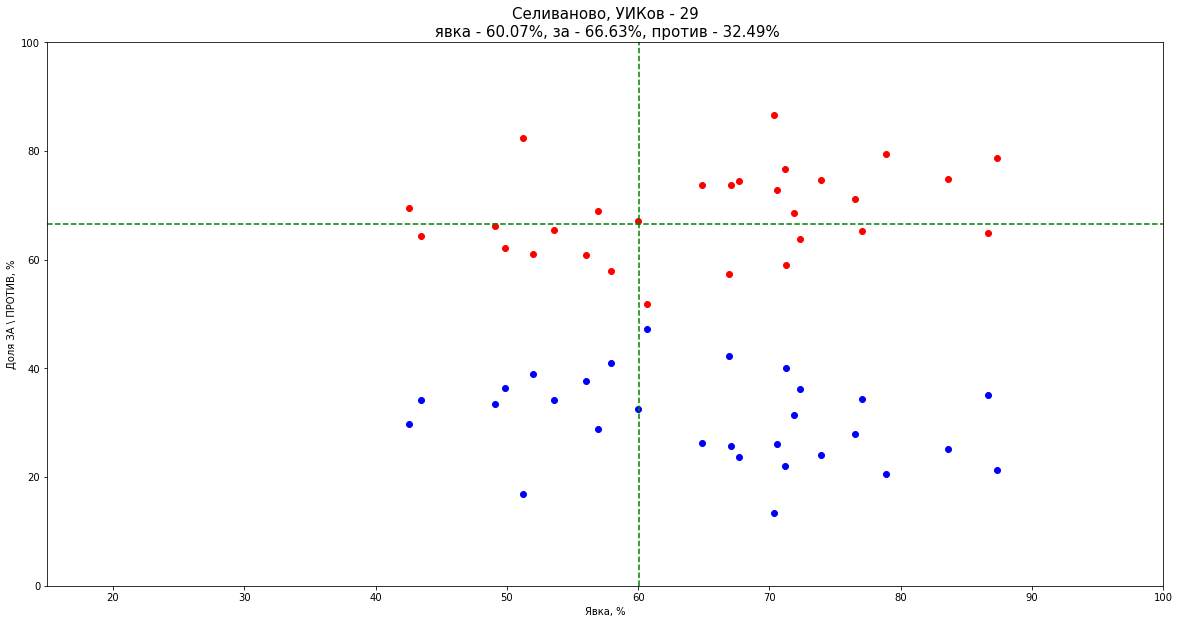

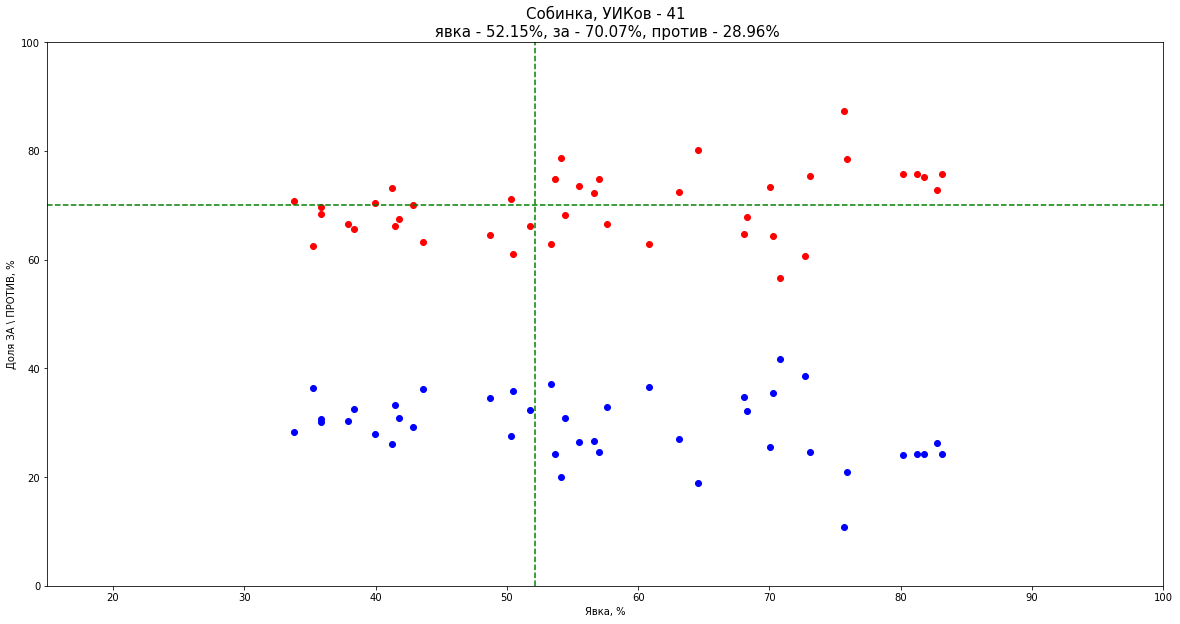

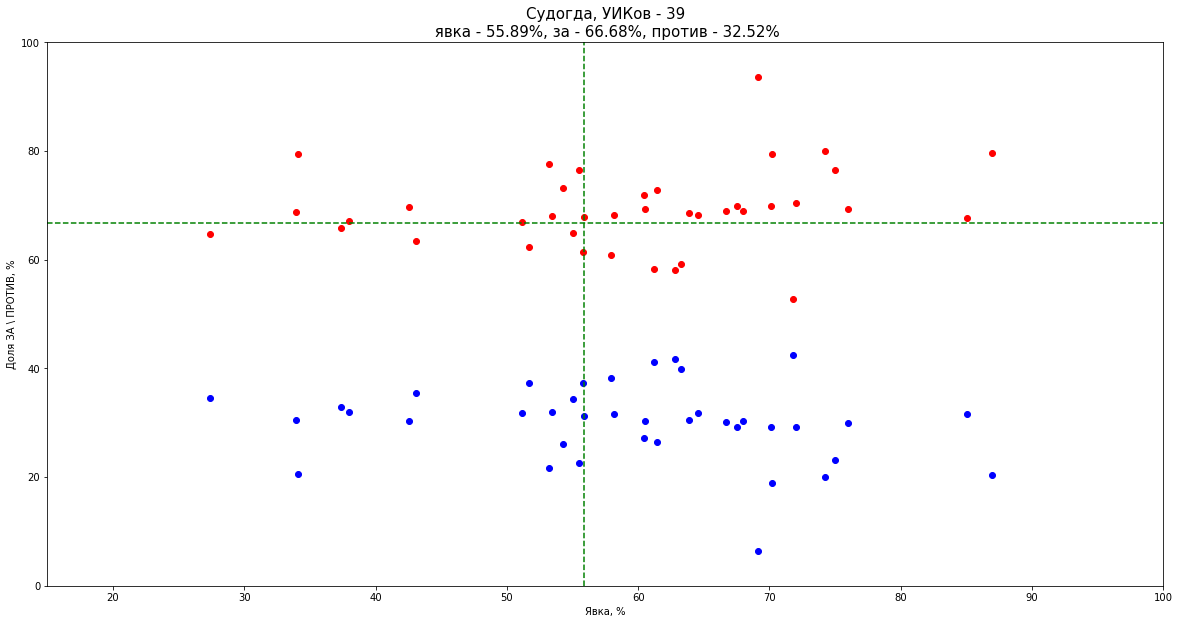

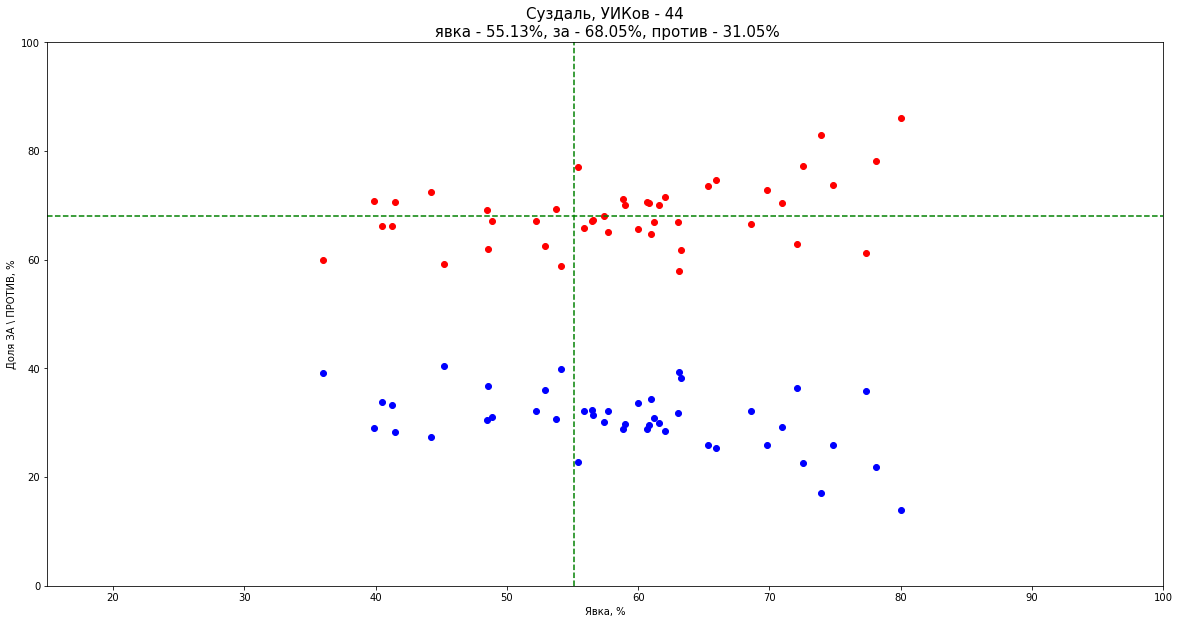

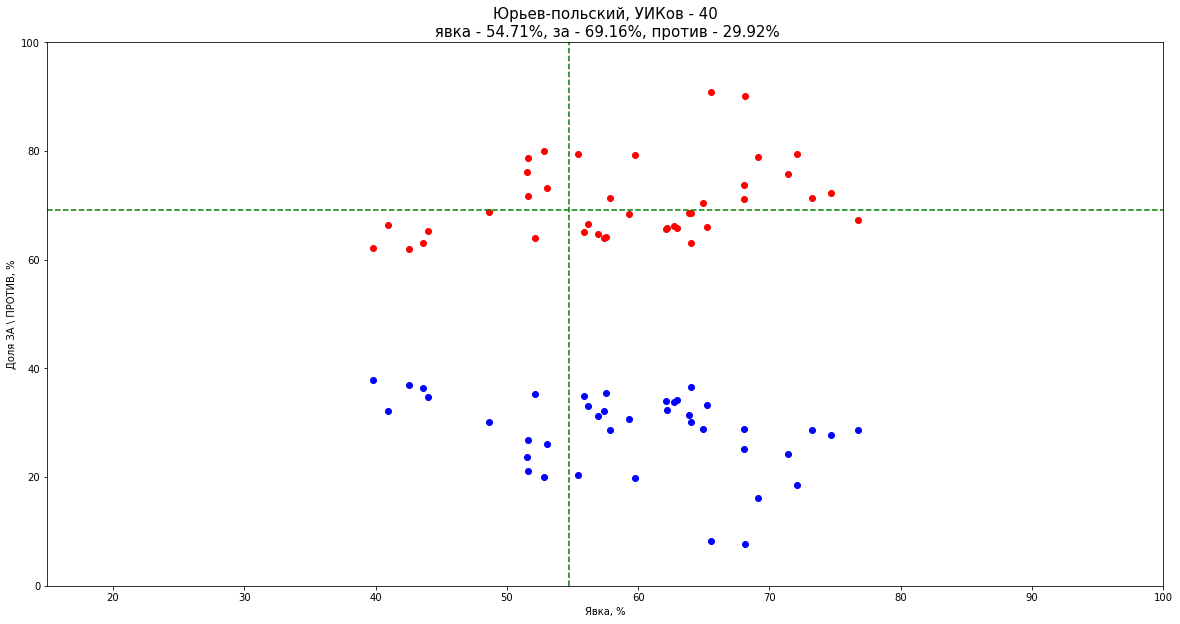

In [13]:
for tik_idx in range(df_tik.shape[0]):
    figure, axes = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20,10))
    
    tik_name = df_tik.iloc[tik_idx]['ТИК']
    df_cur_tik = df_yik[df_yik['ТИК'] == tik_name]
    
    axes.scatter(
        df_cur_tik['Явка%'], 
        df_cur_tik['за%'],
        c='r'
    );
    axes.scatter(
        df_cur_tik['Явка%'], 
        df_cur_tik['против%'],
        c='b');
    axes.set_xlabel('Явка, %');
    axes.set_ylabel('Доля ЗА \ ПРОТИВ, %');
    
    yavka = df_cur_tik['Бюллетени в урнах'].sum() / df_cur_tik['Число участников'].sum() * 100
    za = df_cur_tik['Голосов за'].sum() / df_cur_tik['Бюллетени в урнах'].sum() * 100
    protiv = df_cur_tik['Голосов против'].sum() / df_cur_tik['Бюллетени в урнах'].sum() * 100
    kol_yik = df_cur_tik.shape[0]
    
#     axes.annotate(
#         yavka[outliner_idx].index[0],
#         (yavka[outliner_idx][0], za[outliner_idx][0]), 
#         fontsize=20
#     );

    axes.axvline(x=yavka, ls='--', c='g');
    axes.axhline(y=za, ls='--', c='g');
    axes.set_xlim(15, 100);
    axes.set_ylim(0, 100);
    axes.set_title(
        '{}, УИКов - {}\n явка - {}%, за - {}%, против - {}%'\
        .format(tik_name, kol_yik, round(yavka, 2), round(za, 2), round(protiv, 2)),
        fontsize=15);
#     figure.savefig('plots/{}.png'.format(tik_name));

##### Графики по ТИКам в 2 столбца

##### Размер точки в зависимости от количества бюллетеней в урнах

In [62]:
import plotly.express as px

In [64]:
tik_name = 'Ковров_город'
df_cur_tik = df_yik[df_yik['ТИК'] == tik_name]

fig = px.scatter(
        df_cur_tik, 
        x='Явка%', 
        y='за%',
        hover_data=['Бюллетени в урнах', 'index'],
        size='Бюллетени в урнах',
        color='Бюллетени в урнах',
        size_max=10)
fig.show()